# 1. 데이터 분석
why? 처음 클러스터 분석으로는 명확히 고객유형 분류가 어려워서 다시 클러스터링 후 분석

In [ ]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# csv 불러오기
df = pd.read_csv("/content/drive/MyDrive/미래내일 일경험 프로젝트/기획 프로젝트/DATA/customer_data_.csv", encoding="cp949")

In [ ]:
# 결측치 확인
df.isnull().sum()

clust                      0
AGE                        0
등록(계/피)                    0
고용상태                       0
성별                         0
Willingness to pay/Stay    0
갱신                         0
상품타입                       0
교육수준                       0
소득                         0
지역                         0
결혼여부                       0
월 납입액                      0
VOC                        0
타 상품 보유 현황                 0
온라인방문빈도                    0
갱신인센티브                     0
판매채널                       0
총지불금액                      0
자동차                        0
거주지사이즈                     0
dtype: int64

In [ ]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   clust                    12000 non-null  int64  
 1   AGE                      12000 non-null  int64  
 2   등록(계/피)                  12000 non-null  object 
 3   고용상태                     12000 non-null  object 
 4   성별                       12000 non-null  int64  
 5   Willingness to pay/Stay  12000 non-null  float64
 6   갱신                       12000 non-null  int64  
 7   상품타입                     12000 non-null  object 
 8   교육수준                     12000 non-null  object 
 9   소득                       12000 non-null  int64  
 10  지역                       12000 non-null  object 
 11  결혼여부                     12000 non-null  object 
 12  월 납입액                    12000 non-null  int64  
 13  VOC                      12000 non-null  int64  
 14  타 상품 보유 현황            

In [ ]:
# One-hot encoding
data1 = df[['AGE', '등록(계/피)', '고용상태', '성별', '갱신', '상품타입', '교육수준', '지역', '결혼여부', '타 상품 보유 현황', '온라인방문빈도', '갱신인센티브', '판매채널', '자동차', '거주지사이즈']]

one_hot_df = pd.get_dummies(data1)
one_hot_df

,AGE,성별,갱신,등록(계/피)_계약자,등록(계/피)_피보험자,고용상태_FALSE,고용상태_고용,고용상태_무직,고용상태_휴직,상품타입_고급,...,판매채널_자사영업,판매채널_콜센터,자동차_SUV,자동차_고급차,자동차_스포츠카,자동차_일반세단,자동차_컴팩트카,거주지사이즈_대,거주지사이즈_소,거주지사이즈_중
0,3,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
1,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
3,5,1,0,1,0,0,1,0,0,1,...,1,0,0,0,0,0,1,1,0,0
4,4,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
11996,3,0,1,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
11997,3,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
11998,4,1,0,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
df1 = df[['Willingness to pay/Stay', 'VOC']]

tot_data = pd.concat([one_hot_df, df1], axis=1)
tot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      12000 non-null  int64  
 1   성별                       12000 non-null  int64  
 2   갱신                       12000 non-null  int64  
 3   등록(계/피)_계약자              12000 non-null  uint8  
 4   등록(계/피)_피보험자             12000 non-null  uint8  
 5   고용상태_FALSE               12000 non-null  uint8  
 6   고용상태_고용                  12000 non-null  uint8  
 7   고용상태_무직                  12000 non-null  uint8  
 8   고용상태_휴직                  12000 non-null  uint8  
 9   상품타입_고급                  12000 non-null  uint8  
 10  상품타입_기본                  12000 non-null  uint8  
 11  상품타입_중급                  12000 non-null  uint8  
 12  교육수준_고졸이하                12000 non-null  uint8  
 13  교육수준_대학졸업                12000 non-null  uint8  
 14  교육수준_박사               

In [ ]:
# 정규화
sc = StandardScaler()
tot_data_scaled = sc.fit_transform(tot_data)
pd.DataFrame(tot_data_scaled)

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,-0.070427,1.025149,-0.408486,-1.913163,1.913163,-0.175863,-1.295136,1.721340,-0.31672,-0.313685,...,-0.491652,-0.198295,-0.239698,0.987742,-0.510915,-0.340235,2.036123,-1.534525,-0.810943,-0.424294
1,-1.853401,-0.975467,-0.408486,0.522695,-0.522695,-0.175863,0.772120,-0.580943,-0.31672,-0.313685,...,-0.491652,-0.198295,-0.239698,0.987742,-0.510915,-0.340235,-0.491129,0.651668,-0.325638,0.663175
2,-0.961914,-0.975467,-0.408486,0.522695,-0.522695,-0.175863,-1.295136,-0.580943,3.15736,-0.313685,...,-0.491652,-0.198295,-0.239698,0.987742,-0.510915,-0.340235,-0.491129,0.651668,-0.504656,-0.424294
3,1.712546,1.025149,-0.408486,0.522695,-0.522695,-0.175863,0.772120,-0.580943,-0.31672,3.187913,...,-0.491652,-0.198295,-0.239698,-1.012410,1.957273,2.939142,-0.491129,-1.534525,0.600217,-0.424294
4,0.821059,-0.975467,-0.408486,0.522695,-0.522695,-0.175863,0.772120,-0.580943,-0.31672,-0.313685,...,2.033958,-0.198295,-0.239698,-1.012410,-0.510915,-0.340235,-0.491129,0.651668,0.119108,-0.424294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,-1.853401,1.025149,-0.408486,0.522695,-0.522695,-0.175863,0.772120,-0.580943,-0.31672,-0.313685,...,-0.491652,-0.198295,-0.239698,0.987742,-0.510915,-0.340235,-0.491129,0.651668,2.224522,-0.424294
11996,-0.070427,-0.975467,2.448062,-1.913163,1.913163,-0.175863,0.772120,-0.580943,-0.31672,-0.313685,...,-0.491652,-0.198295,-0.239698,0.987742,-0.510915,-0.340235,-0.491129,0.651668,-0.703830,-0.424294
11997,-0.070427,1.025149,-0.408486,-1.913163,1.913163,-0.175863,-1.295136,1.721340,-0.31672,-0.313685,...,-0.491652,-0.198295,-0.239698,0.987742,-0.510915,-0.340235,-0.491129,0.651668,0.025735,2.838111
11998,0.821059,1.025149,-0.408486,0.522695,-0.522695,-0.175863,0.772120,-0.580943,-0.31672,-0.313685,...,-0.491652,-0.198295,-0.239698,0.987742,-0.510915,2.939142,-0.491129,-1.534525,-0.066542,-0.424294


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

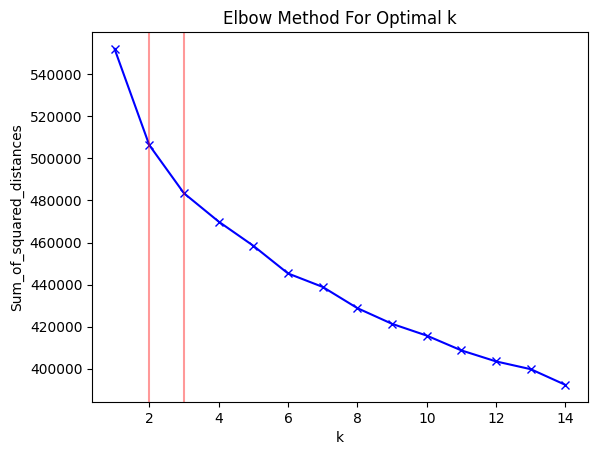

In [ ]:
# elbow method 시각화

sum_of_squared_distances = []

K = range(1, 15)
for i in K:
    kmean_plus = KMeans(n_clusters=i)
    kmean_plus.fit(tot_data_scaled)
    sum_of_squared_distances.append(kmean_plus.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.axvline(2,c= 'r',alpha =0.4)
plt.axvline(3,c= 'r',alpha =0.4)
plt.show()

# 2. K-means Clustering

In [ ]:
# k = 3 클러스터링

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit(tot_data_scaled)

tot_data['cluster'] = clusters.labels_
tot_data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,AGE,성별,갱신,등록(계/피)_계약자,등록(계/피)_피보험자,고용상태_FALSE,고용상태_고용,고용상태_무직,고용상태_휴직,상품타입_고급,...,자동차_고급차,자동차_스포츠카,자동차_일반세단,자동차_컴팩트카,거주지사이즈_대,거주지사이즈_소,거주지사이즈_중,Willingness to pay/Stay,VOC,cluster
0,3,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,2.616381,0,2
1,1,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,6.352530,1,0
2,2,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,1,4.974354,0,1
3,5,1,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,13.480284,0,0
4,4,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,9.776436,0,0


In [ ]:
# 클러스터별 데이터 개수
tot_data.groupby('cluster').count()

,AGE,성별,갱신,등록(계/피)_계약자,등록(계/피)_피보험자,고용상태_FALSE,고용상태_고용,고용상태_무직,고용상태_휴직,상품타입_고급,...,자동차_SUV,자동차_고급차,자동차_스포츠카,자동차_일반세단,자동차_컴팩트카,거주지사이즈_대,거주지사이즈_소,거주지사이즈_중,Willingness to pay/Stay,VOC
cluster,,,,,,,,,,,,,,,,,,,,,
0,5236,5236,5236,5236,5236,5236,5236,5236,5236,5236,...,5236,5236,5236,5236,5236,5236,5236,5236,5236,5236
1,4189,4189,4189,4189,4189,4189,4189,4189,4189,4189,...,4189,4189,4189,4189,4189,4189,4189,4189,4189,4189
2,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,...,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575


In [ ]:
# 차원축소
from sklearn.decomposition import PCA
X = tot_data_scaled.copy()

pca = PCA(n_components=2)

pca.fit(X)
x_pca = pca.transform(X)
x_pca

array([[ 3.73422571,  2.2594435 ],
       [-0.95850346, -1.26582297],
       [-1.09317454,  0.55429096],
       ...,
       [ 3.6245167 ,  2.93133343],
       [-1.1514768 , -0.61320521],
       [ 3.75887454,  1.99322334]])

In [ ]:
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = tot_data['cluster']
pca_df.head()

,0,1,cluster
0,3.734226,2.259443,2
1,-0.958503,-1.265823,0
2,-1.093175,0.554291,1
3,-1.124497,0.368917,0
4,-1.034125,-1.209106,0


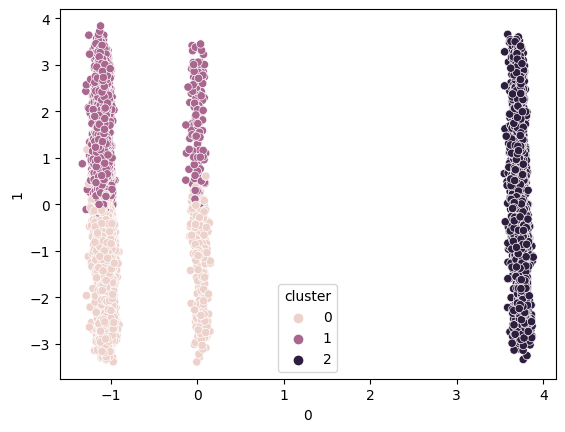

In [ ]:
# 시각화

axs = plt.subplots()
axs = sns.scatterplot(x=0, y=1, hue='cluster', data=pca_df)

# 3. 클러스터별 특징 분석

In [ ]:
cluster_0 = tot_data.loc[tot_data['cluster']==0, :]
cluster_1 = tot_data.loc[tot_data['cluster']==1, :]
cluster_2 = tot_data.loc[tot_data['cluster']==2, :]

## cluster 0

### Willingness to pay/Stay

In [ ]:
cluster_0['Willingness to pay/Stay'].mean()

8.965608241214667

### VOC

In [ ]:
cluster_0['VOC'].mean()

0.39744079449961806

### AGE

In [ ]:
cluster_0['AGE'].unique()

array([1, 5, 4, 3, 2, 6])

In [ ]:
for i in range(1, 7):
    print(f'AGE({i}) :', round((len(cluster_0.loc[cluster_0['AGE']==i, 'AGE']) / len(cluster_0['AGE']))*100, 2), '%')

AGE(1) : 20.26 %
AGE(2) : 14.21 %
AGE(3) : 22.08 %
AGE(4) : 31.57 %
AGE(5) : 11.38 %
AGE(6) : 0.5 %


### 성별

In [ ]:
cluster_0['성별'].unique()

array([0, 1])

In [ ]:
for i in range(0, 2):
    print(f'성별({i}) :', round((len(cluster_0.loc[cluster_0['성별']==i, '성별']) / len(cluster_0['성별']))*100, 2), '%')

성별(0) : 53.76 %
성별(1) : 46.24 %


### 등록(계/피)

In [ ]:
print(f'등록(계약자) :', round((len(cluster_0.loc[cluster_0['등록(계/피)_계약자']==1, '등록(계/피)_계약자']) / len(cluster_0['등록(계/피)_계약자']))*100, 2), '%')
print(f'등록(피보험자) :', round((len(cluster_0.loc[cluster_0['등록(계/피)_피보험자']==1, '등록(계/피)_피보험자']) / len(cluster_0['등록(계/피)_피보험자']))*100, 2), '%')

등록(계약자) : 100.0 %
등록(피보험자) : 0.0 %


### 고용상태

In [ ]:
print(f'고용상태(무직) :', round((len(cluster_0.loc[cluster_0['고용상태_무직']==1, '고용상태_무직']) / len(cluster_0['고용상태_무직']))*100, 2), '%')
print(f'고용상태(휴직) :', round((len(cluster_0.loc[cluster_0['고용상태_휴직']==1, '고용상태_휴직']) / len(cluster_0['고용상태_휴직']))*100, 2), '%')
print(f'고용상태(고용) :', round((len(cluster_0.loc[cluster_0['고용상태_고용']==1, '고용상태_고용']) / len(cluster_0['고용상태_고용']))*100, 2), '%')
print(f'고용상태(FALSE) :', round((len(cluster_0.loc[cluster_0['고용상태_FALSE']==1, '고용상태_FALSE']) / len(cluster_0['고용상태_FALSE']))*100, 2), '%')

고용상태(무직) : 3.27 %
고용상태(휴직) : 1.87 %
고용상태(고용) : 94.71 %
고용상태(FALSE) : 0.15 %


### 상품타입

In [ ]:
print(f'상품타입(기본) :', round((len(cluster_0.loc[cluster_0['상품타입_기본']==1, '상품타입_기본']) / len(cluster_0['상품타입_기본']))*100, 2), '%')
print(f'상품타입(중급) :', round((len(cluster_0.loc[cluster_0['상품타입_중급']==1, '상품타입_중급']) / len(cluster_0['상품타입_중급']))*100, 2), '%')
print(f'상품타입(고급) :', round((len(cluster_0.loc[cluster_0['상품타입_고급']==1, '상품타입_고급']) / len(cluster_0['상품타입_고급']))*100, 2), '%')

상품타입(기본) : 61.38 %
상품타입(중급) : 30.18 %
상품타입(고급) : 8.44 %


### 교육수준

In [ ]:
print(f'교육수준(고졸이하) :', round((len(cluster_0.loc[cluster_0['교육수준_고졸이하']==1, '교육수준_고졸이하']) / len(cluster_0['교육수준_고졸이하']))*100, 2), '%')
print(f'교육수준(대학졸업) :', round((len(cluster_0.loc[cluster_0['교육수준_대학졸업']==1, '교육수준_대학졸업']) / len(cluster_0['교육수준_대학졸업']))*100, 2), '%')
print(f'교육수준(석사) :', round((len(cluster_0.loc[cluster_0['교육수준_석사']==1, '교육수준_석사']) / len(cluster_0['교육수준_석사']))*100, 2), '%')
print(f'교육수준(박사) :', round((len(cluster_0.loc[cluster_0['교육수준_박사']==1, '교육수준_박사']) / len(cluster_0['교육수준_박사']))*100, 2), '%')

교육수준(고졸이하) : 25.25 %
교육수준(대학졸업) : 58.9 %
교육수준(석사) : 10.75 %
교육수준(박사) : 5.1 %


### 지역

In [ ]:
print(f'지역(도심) :', round((len(cluster_0.loc[cluster_0['지역_도심']==1, '지역_도심']) / len(cluster_0['지역_도심']))*100, 2), '%')
print(f'지역(도시근교) :', round((len(cluster_0.loc[cluster_0['지역_도시근교']==1, '지역_도시근교']) / len(cluster_0['지역_도시근교']))*100, 2), '%')
print(f'지역(시골) :', round((len(cluster_0.loc[cluster_0['지역_시골']==1, '지역_시골']) / len(cluster_0['지역_시골']))*100, 2), '%')

지역(도심) : 30.54 %
지역(도시근교) : 35.54 %
지역(시골) : 33.92 %


### 결혼여부

In [ ]:
print(f'결혼여부(기혼) :', round((len(cluster_0.loc[cluster_0['결혼여부_기혼']==1, '결혼여부_기혼']) / len(cluster_0['결혼여부_기혼']))*100, 2), '%')
print(f'결혼여부(미혼) :', round((len(cluster_0.loc[cluster_0['결혼여부_미혼']==1, '결혼여부_미혼']) / len(cluster_0['결혼여부_미혼']))*100, 2), '%')

결혼여부(기혼) : 81.68 %
결혼여부(미혼) : 18.32 %


### 타 상품 보유 현황

In [ ]:
print(f'타 상품 보유 현황(1) :', round((len(cluster_0.loc[cluster_0['타 상품 보유 현황_1']==1, '타 상품 보유 현황_1']) / len(cluster_0['타 상품 보유 현황_1']))*100, 2), '%')
print(f'타 상품 보유 현황(2) :', round((len(cluster_0.loc[cluster_0['타 상품 보유 현황_2']==1, '타 상품 보유 현황_2']) / len(cluster_0['타 상품 보유 현황_2']))*100, 2), '%')
print(f'타 상품 보유 현황(3) :', round((len(cluster_0.loc[cluster_0['타 상품 보유 현황_3']==1, '타 상품 보유 현황_3']) / len(cluster_0['타 상품 보유 현황_3']))*100, 2), '%')
print(f'타 상품 보유 현황(4이상) :', round((len(cluster_0.loc[cluster_0['타 상품 보유 현황_4이상']==1, '타 상품 보유 현황_4이상']) / len(cluster_0['타 상품 보유 현황_4이상']))*100, 2), '%')

타 상품 보유 현황(1) : 35.89 %
타 상품 보유 현황(2) : 24.85 %
타 상품 보유 현황(3) : 13.12 %
타 상품 보유 현황(4이상) : 26.15 %


### 온라인방문빈도

In [ ]:
print(f'온라인방문빈도(비방문) :', round((len(cluster_0.loc[cluster_0['온라인방문빈도_비방문']==1, '온라인방문빈도_비방문']) / len(cluster_0['온라인방문빈도_비방문']))*100, 2), '%')
print(f'온라인방문빈도(종종) :', round((len(cluster_0.loc[cluster_0['온라인방문빈도_종종']==1, '온라인방문빈도_종종']) / len(cluster_0['온라인방문빈도_종종']))*100, 2), '%')
print(f'온라인방문빈도(자주방문) :', round((len(cluster_0.loc[cluster_0['온라인방문빈도_자주방문']==1, '온라인방문빈도_자주방문']) / len(cluster_0['온라인방문빈도_자주방문']))*100, 2), '%')

온라인방문빈도(비방문) : 94.4 %
온라인방문빈도(종종) : 5.6 %
온라인방문빈도(자주방문) : 0.0 %


### 갱신인센티브

In [ ]:
print(f'갱신인센티브(없음) :', round((len(cluster_0.loc[cluster_0['갱신인센티브_없음']==1, '갱신인센티브_없음']) / len(cluster_0['갱신인센티브_없음']))*100, 2), '%')
print(f'갱신인센티브(포인트) :', round((len(cluster_0.loc[cluster_0['갱신인센티브_포인트']==1, '갱신인센티브_포인트']) / len(cluster_0['갱신인센티브_포인트']))*100, 2), '%')
print(f'갱신인센티브(할인) :', round((len(cluster_0.loc[cluster_0['갱신인센티브_할인']==1, '갱신인센티브_할인']) / len(cluster_0['갱신인센티브_할인']))*100, 2), '%')
print(f'갱신인센티브(설계사독려) :', round((len(cluster_0.loc[cluster_0['갱신인센티브_설계사독려']==1, '갱신인센티브_설계사독려']) / len(cluster_0['갱신인센티브_설계사독려']))*100, 2), '%')

갱신인센티브(없음) : 13.43 %
갱신인센티브(포인트) : 17.0 %
갱신인센티브(할인) : 31.47 %
갱신인센티브(설계사독려) : 38.1 %


### 판매채널

In [ ]:
print(f'판매채널(대리점) :', round((len(cluster_0.loc[cluster_0['판매채널_대리점']==1, '판매채널_대리점']) / len(cluster_0['판매채널_대리점']))*100, 2), '%')
print(f'판매채널(인터넷) :', round((len(cluster_0.loc[cluster_0['판매채널_인터넷']==1, '판매채널_인터넷']) / len(cluster_0['판매채널_인터넷']))*100, 2), '%')
print(f'판매채널(자사영업) :', round((len(cluster_0.loc[cluster_0['판매채널_자사영업']==1, '판매채널_자사영업']) / len(cluster_0['판매채널_자사영업']))*100, 2), '%')
print(f'판매채널(콜센터) :', round((len(cluster_0.loc[cluster_0['판매채널_콜센터']==1, '판매채널_콜센터']) / len(cluster_0['판매채널_콜센터']))*100, 2), '%')

판매채널(대리점) : 36.57 %
판매채널(인터넷) : 14.69 %
판매채널(자사영업) : 29.16 %
판매채널(콜센터) : 19.58 %


### 자동차

In [ ]:
print(f'자동차(컴팩트카) :', round((len(cluster_0.loc[cluster_0['자동차_컴팩트카']==1, '자동차_컴팩트카']) / len(cluster_0['자동차_컴팩트카']))*100, 2), '%')
print(f'자동차(일반세단) :', round((len(cluster_0.loc[cluster_0['자동차_일반세단']==1, '자동차_일반세단']) / len(cluster_0['자동차_일반세단']))*100, 2), '%')
print(f'자동차(SUV) :', round((len(cluster_0.loc[cluster_0['자동차_SUV']==1, '자동차_SUV']) / len(cluster_0['자동차_SUV']))*100, 2), '%')
print(f'자동차(스포츠카) :', round((len(cluster_0.loc[cluster_0['자동차_스포츠카']==1, '자동차_스포츠카']) / len(cluster_0['자동차_스포츠카']))*100, 2), '%')
print(f'자동차(고급차) :', round((len(cluster_0.loc[cluster_0['자동차_고급차']==1, '자동차_고급차']) / len(cluster_0['자동차_고급차']))*100, 2), '%')

자동차(컴팩트카) : 21.41 %
자동차(일반세단) : 51.8 %
자동차(SUV) : 18.66 %
자동차(스포츠카) : 4.95 %
자동차(고급차) : 3.19 %


### 거주지사이즈

In [ ]:
print(f'거주지사이즈(대) :', round((len(cluster_0.loc[cluster_0['거주지사이즈_대']==1, '거주지사이즈_대']) / len(cluster_0['거주지사이즈_대']))*100, 2), '%')
print(f'거주지사이즈(중) :', round((len(cluster_0.loc[cluster_0['거주지사이즈_중']==1, '거주지사이즈_중']) / len(cluster_0['거주지사이즈_중']))*100, 2), '%')
print(f'거주지사이즈(소) :', round((len(cluster_0.loc[cluster_0['거주지사이즈_소']==1, '거주지사이즈_소']) / len(cluster_0['거주지사이즈_소']))*100, 2), '%')

거주지사이즈(대) : 10.43 %
거주지사이즈(중) : 72.61 %
거주지사이즈(소) : 16.96 %


## cluster 1

### Willingness to pay/Stay

In [ ]:
cluster_1['Willingness to pay/Stay'].mean()

8.859380974934354

### VOC

In [ ]:
cluster_1['VOC'].mean()

0.39006922893291957

### AGE

In [ ]:
cluster_1['AGE'].unique()

array([2, 3, 1, 4, 5, 6])

In [ ]:
for i in range(1, 7):
    print(f'AGE({i}) :', round((len(cluster_1.loc[cluster_1['AGE']==i, 'AGE']) / len(cluster_1['AGE']))*100, 2), '%')

AGE(1) : 1.46 %
AGE(2) : 11.75 %
AGE(3) : 61.83 %
AGE(4) : 19.1 %
AGE(5) : 5.68 %
AGE(6) : 0.19 %


### 성별

In [ ]:
cluster_1['성별'].unique()

array([0, 1])

In [ ]:
for i in range(0, 2):
    print(f'성별({i}) :', round((len(cluster_1.loc[cluster_1['성별']==i, '성별']) / len(cluster_1['성별']))*100, 2), '%')

성별(0) : 47.74 %
성별(1) : 52.26 %


### 등록(계/피)

In [ ]:
print(f'등록(계약자) :', round((len(cluster_1.loc[cluster_1['등록(계/피)_계약자']==1, '등록(계/피)_계약자']) / len(cluster_1['등록(계/피)_계약자']))*100, 2), '%')
print(f'등록(피보험자) :', round((len(cluster_1.loc[cluster_1['등록(계/피)_피보험자']==1, '등록(계/피)_피보험자']) / len(cluster_1['등록(계/피)_피보험자']))*100, 2), '%')

등록(계약자) : 100.0 %
등록(피보험자) : 0.0 %


### 고용상태

In [ ]:
print(f'고용상태(무직) :', round((len(cluster_1.loc[cluster_1['고용상태_무직']==1, '고용상태_무직']) / len(cluster_1['고용상태_무직']))*100, 2), '%')
print(f'고용상태(휴직) :', round((len(cluster_1.loc[cluster_1['고용상태_휴직']==1, '고용상태_휴직']) / len(cluster_1['고용상태_휴직']))*100, 2), '%')
print(f'고용상태(고용) :', round((len(cluster_1.loc[cluster_1['고용상태_고용']==1, '고용상태_고용']) / len(cluster_1['고용상태_고용']))*100, 2), '%')
print(f'고용상태(FALSE) :', round((len(cluster_1.loc[cluster_1['고용상태_FALSE']==1, '고용상태_FALSE']) / len(cluster_1['고용상태_FALSE']))*100, 2), '%')

고용상태(무직) : 52.71 %
고용상태(휴직) : 18.38 %
고용상태(고용) : 22.15 %
고용상태(FALSE) : 6.76 %


### 상품타입

In [ ]:
print(f'상품타입(기본) :', round((len(cluster_1.loc[cluster_1['상품타입_기본']==1, '상품타입_기본']) / len(cluster_1['상품타입_기본']))*100, 2), '%')
print(f'상품타입(중급) :', round((len(cluster_1.loc[cluster_1['상품타입_중급']==1, '상품타입_중급']) / len(cluster_1['상품타입_중급']))*100, 2), '%')
print(f'상품타입(고급) :', round((len(cluster_1.loc[cluster_1['상품타입_고급']==1, '상품타입_고급']) / len(cluster_1['상품타입_고급']))*100, 2), '%')

상품타입(기본) : 59.25 %
상품타입(중급) : 31.22 %
상품타입(고급) : 9.52 %


### 교육수준

In [ ]:
print(f'교육수준(고졸이하) :', round((len(cluster_1.loc[cluster_1['교육수준_고졸이하']==1, '교육수준_고졸이하']) / len(cluster_1['교육수준_고졸이하']))*100, 2), '%')
print(f'교육수준(대학졸업) :', round((len(cluster_1.loc[cluster_1['교육수준_대학졸업']==1, '교육수준_대학졸업']) / len(cluster_1['교육수준_대학졸업']))*100, 2), '%')
print(f'교육수준(석사) :', round((len(cluster_1.loc[cluster_1['교육수준_석사']==1, '교육수준_석사']) / len(cluster_1['교육수준_석사']))*100, 2), '%')
print(f'교육수준(박사) :', round((len(cluster_1.loc[cluster_1['교육수준_박사']==1, '교육수준_박사']) / len(cluster_1['교육수준_박사']))*100, 2), '%')

교육수준(고졸이하) : 32.99 %
교육수준(대학졸업) : 59.51 %
교육수준(석사) : 5.25 %
교육수준(박사) : 2.24 %


### 지역

In [ ]:
print(f'지역(도심) :', round((len(cluster_1.loc[cluster_1['지역_도심']==1, '지역_도심']) / len(cluster_1['지역_도심']))*100, 2), '%')
print(f'지역(도시근교) :', round((len(cluster_1.loc[cluster_1['지역_도시근교']==1, '지역_도시근교']) / len(cluster_1['지역_도시근교']))*100, 2), '%')
print(f'지역(시골) :', round((len(cluster_1.loc[cluster_1['지역_시골']==1, '지역_시골']) / len(cluster_1['지역_시골']))*100, 2), '%')

지역(도심) : 1.0 %
지역(도시근교) : 97.97 %
지역(시골) : 1.03 %


### 결혼여부

In [ ]:
print(f'결혼여부(기혼) :', round((len(cluster_1.loc[cluster_1['결혼여부_기혼']==1, '결혼여부_기혼']) / len(cluster_1['결혼여부_기혼']))*100, 2), '%')
print(f'결혼여부(미혼) :', round((len(cluster_1.loc[cluster_1['결혼여부_미혼']==1, '결혼여부_미혼']) / len(cluster_1['결혼여부_미혼']))*100, 2), '%')

결혼여부(기혼) : 28.67 %
결혼여부(미혼) : 71.33 %


### 타 상품 보유 현황

In [ ]:
print(f'타 상품 보유 현황(1) :', round((len(cluster_1.loc[cluster_1['타 상품 보유 현황_1']==1, '타 상품 보유 현황_1']) / len(cluster_1['타 상품 보유 현황_1']))*100, 2), '%')
print(f'타 상품 보유 현황(2) :', round((len(cluster_1.loc[cluster_1['타 상품 보유 현황_2']==1, '타 상품 보유 현황_2']) / len(cluster_1['타 상품 보유 현황_2']))*100, 2), '%')
print(f'타 상품 보유 현황(3) :', round((len(cluster_1.loc[cluster_1['타 상품 보유 현황_3']==1, '타 상품 보유 현황_3']) / len(cluster_1['타 상품 보유 현황_3']))*100, 2), '%')
print(f'타 상품 보유 현황(4이상) :', round((len(cluster_1.loc[cluster_1['타 상품 보유 현황_4이상']==1, '타 상품 보유 현황_4이상']) / len(cluster_1['타 상품 보유 현황_4이상']))*100, 2), '%')

타 상품 보유 현황(1) : 35.07 %
타 상품 보유 현황(2) : 26.04 %
타 상품 보유 현황(3) : 12.72 %
타 상품 보유 현황(4이상) : 26.16 %


### 온라인방문빈도

In [ ]:
print(f'온라인방문빈도(비방문) :', round((len(cluster_1.loc[cluster_1['온라인방문빈도_비방문']==1, '온라인방문빈도_비방문']) / len(cluster_1['온라인방문빈도_비방문']))*100, 2), '%')
print(f'온라인방문빈도(종종) :', round((len(cluster_1.loc[cluster_1['온라인방문빈도_종종']==1, '온라인방문빈도_종종']) / len(cluster_1['온라인방문빈도_종종']))*100, 2), '%')
print(f'온라인방문빈도(자주방문) :', round((len(cluster_1.loc[cluster_1['온라인방문빈도_자주방문']==1, '온라인방문빈도_자주방문']) / len(cluster_1['온라인방문빈도_자주방문']))*100, 2), '%')

온라인방문빈도(비방문) : 95.13 %
온라인방문빈도(종종) : 4.87 %
온라인방문빈도(자주방문) : 0.0 %


### 갱신인센티브

In [ ]:
print(f'갱신인센티브(없음) :', round((len(cluster_1.loc[cluster_1['갱신인센티브_없음']==1, '갱신인센티브_없음']) / len(cluster_1['갱신인센티브_없음']))*100, 2), '%')
print(f'갱신인센티브(포인트) :', round((len(cluster_1.loc[cluster_1['갱신인센티브_포인트']==1, '갱신인센티브_포인트']) / len(cluster_1['갱신인센티브_포인트']))*100, 2), '%')
print(f'갱신인센티브(할인) :', round((len(cluster_1.loc[cluster_1['갱신인센티브_할인']==1, '갱신인센티브_할인']) / len(cluster_1['갱신인센티브_할인']))*100, 2), '%')
print(f'갱신인센티브(설계사독려) :', round((len(cluster_1.loc[cluster_1['갱신인센티브_설계사독려']==1, '갱신인센티브_설계사독려']) / len(cluster_1['갱신인센티브_설계사독려']))*100, 2), '%')

갱신인센티브(없음) : 7.69 %
갱신인센티브(포인트) : 13.94 %
갱신인센티브(할인) : 52.38 %
갱신인센티브(설계사독려) : 26.0 %


### 판매채널

In [ ]:
print(f'판매채널(대리점) :', round((len(cluster_1.loc[cluster_1['판매채널_대리점']==1, '판매채널_대리점']) / len(cluster_1['판매채널_대리점']))*100, 2), '%')
print(f'판매채널(인터넷) :', round((len(cluster_1.loc[cluster_1['판매채널_인터넷']==1, '판매채널_인터넷']) / len(cluster_1['판매채널_인터넷']))*100, 2), '%')
print(f'판매채널(자사영업) :', round((len(cluster_1.loc[cluster_1['판매채널_자사영업']==1, '판매채널_자사영업']) / len(cluster_1['판매채널_자사영업']))*100, 2), '%')
print(f'판매채널(콜센터) :', round((len(cluster_1.loc[cluster_1['판매채널_콜센터']==1, '판매채널_콜센터']) / len(cluster_1['판매채널_콜센터']))*100, 2), '%')

판매채널(대리점) : 40.01 %
판매채널(인터넷) : 14.35 %
판매채널(자사영업) : 26.83 %
판매채널(콜센터) : 18.81 %


### 자동차

In [ ]:
print(f'자동차(컴팩트카) :', round((len(cluster_1.loc[cluster_1['자동차_컴팩트카']==1, '자동차_컴팩트카']) / len(cluster_1['자동차_컴팩트카']))*100, 2), '%')
print(f'자동차(일반세단) :', round((len(cluster_1.loc[cluster_1['자동차_일반세단']==1, '자동차_일반세단']) / len(cluster_1['자동차_일반세단']))*100, 2), '%')
print(f'자동차(SUV) :', round((len(cluster_1.loc[cluster_1['자동차_SUV']==1, '자동차_SUV']) / len(cluster_1['자동차_SUV']))*100, 2), '%')
print(f'자동차(스포츠카) :', round((len(cluster_1.loc[cluster_1['자동차_스포츠카']==1, '자동차_스포츠카']) / len(cluster_1['자동차_스포츠카']))*100, 2), '%')
print(f'자동차(고급차) :', round((len(cluster_1.loc[cluster_1['자동차_고급차']==1, '자동차_고급차']) / len(cluster_1['자동차_고급차']))*100, 2), '%')

자동차(컴팩트카) : 19.58 %
자동차(일반세단) : 49.58 %
자동차(SUV) : 20.34 %
자동차(스포츠카) : 5.92 %
자동차(고급차) : 4.58 %


### 거주지사이즈

In [ ]:
print(f'거주지사이즈(대) :', round((len(cluster_1.loc[cluster_1['거주지사이즈_대']==1, '거주지사이즈_대']) / len(cluster_1['거주지사이즈_대']))*100, 2), '%')
print(f'거주지사이즈(중) :', round((len(cluster_1.loc[cluster_1['거주지사이즈_중']==1, '거주지사이즈_중']) / len(cluster_1['거주지사이즈_중']))*100, 2), '%')
print(f'거주지사이즈(소) :', round((len(cluster_1.loc[cluster_1['거주지사이즈_소']==1, '거주지사이즈_소']) / len(cluster_1['거주지사이즈_소']))*100, 2), '%')

거주지사이즈(대) : 10.41 %
거주지사이즈(중) : 66.84 %
거주지사이즈(소) : 22.75 %


## cluster 2

### Willingness to pay/Stay

In [ ]:
cluster_2['Willingness to pay/Stay'].mean()

8.643829330485437

### VOC

In [ ]:
cluster_2['VOC'].mean()

0.3755339805825243

### AGE

In [ ]:
cluster_2['AGE'].unique()

array([3, 4, 5, 6, 1, 2])

In [ ]:
for i in range(1, 7):
    print(f'AGE({i}) :', round((len(cluster_2.loc[cluster_2['AGE']==i, 'AGE']) / len(cluster_2['AGE']))*100, 2), '%')

AGE(1) : 12.89 %
AGE(2) : 11.73 %
AGE(3) : 39.96 %
AGE(4) : 26.06 %
AGE(5) : 8.66 %
AGE(6) : 0.7 %


### 성별

In [ ]:
cluster_2['성별'].unique()

array([1, 0])

In [ ]:
for i in range(0, 2):
    print(f'성별({i}) :', round((len(cluster_2.loc[cluster_2['성별']==i, '성별']) / len(cluster_2['성별']))*100, 2), '%')

성별(0) : 51.81 %
성별(1) : 48.19 %


### 등록(계/피)

In [ ]:
print(f'등록(계약자) :', round((len(cluster_2.loc[cluster_2['등록(계/피)_계약자']==1, '등록(계/피)_계약자']) / len(cluster_2['등록(계/피)_계약자']))*100, 2), '%')
print(f'등록(피보험자) :', round((len(cluster_2.loc[cluster_2['등록(계/피)_피보험자']==1, '등록(계/피)_피보험자']) / len(cluster_2['등록(계/피)_피보험자']))*100, 2), '%')

등록(계약자) : 0.0 %
등록(피보험자) : 100.0 %


### 고용상태

In [ ]:
print(f'고용상태(무직) :', round((len(cluster_2.loc[cluster_2['고용상태_무직']==1, '고용상태_무직']) / len(cluster_2['고용상태_무직']))*100, 2), '%')
print(f'고용상태(휴직) :', round((len(cluster_2.loc[cluster_2['고용상태_휴직']==1, '고용상태_휴직']) / len(cluster_2['고용상태_휴직']))*100, 2), '%')
print(f'고용상태(고용) :', round((len(cluster_2.loc[cluster_2['고용상태_고용']==1, '고용상태_고용']) / len(cluster_2['고용상태_고용']))*100, 2), '%')
print(f'고용상태(FALSE) :', round((len(cluster_2.loc[cluster_2['고용상태_FALSE']==1, '고용상태_FALSE']) / len(cluster_2['고용상태_FALSE']))*100, 2), '%')

고용상태(무직) : 25.2 %
고용상태(휴직) : 8.78 %
고용상태(고용) : 63.34 %
고용상태(FALSE) : 2.68 %


### 상품타입

In [ ]:
print(f'상품타입(기본) :', round((len(cluster_2.loc[cluster_2['상품타입_기본']==1, '상품타입_기본']) / len(cluster_2['상품타입_기본']))*100, 2), '%')
print(f'상품타입(중급) :', round((len(cluster_2.loc[cluster_2['상품타입_중급']==1, '상품타입_중급']) / len(cluster_2['상품타입_중급']))*100, 2), '%')
print(f'상품타입(고급) :', round((len(cluster_2.loc[cluster_2['상품타입_고급']==1, '상품타입_고급']) / len(cluster_2['상품타입_고급']))*100, 2), '%')

상품타입(기본) : 61.44 %
상품타입(중급) : 29.48 %
상품타입(고급) : 9.09 %


### 교육수준

In [ ]:
print(f'교육수준(고졸이하) :', round((len(cluster_2.loc[cluster_2['교육수준_고졸이하']==1, '교육수준_고졸이하']) / len(cluster_2['교육수준_고졸이하']))*100, 2), '%')
print(f'교육수준(대학졸업) :', round((len(cluster_2.loc[cluster_2['교육수준_대학졸업']==1, '교육수준_대학졸업']) / len(cluster_2['교육수준_대학졸업']))*100, 2), '%')
print(f'교육수준(석사) :', round((len(cluster_2.loc[cluster_2['교육수준_석사']==1, '교육수준_석사']) / len(cluster_2['교육수준_석사']))*100, 2), '%')
print(f'교육수준(박사) :', round((len(cluster_2.loc[cluster_2['교육수준_박사']==1, '교육수준_박사']) / len(cluster_2['교육수준_박사']))*100, 2), '%')

교육수준(고졸이하) : 30.02 %
교육수준(대학졸업) : 59.34 %
교육수준(석사) : 7.61 %
교육수준(박사) : 3.03 %


### 지역

In [ ]:
print(f'지역(도심) :', round((len(cluster_2.loc[cluster_2['지역_도심']==1, '지역_도심']) / len(cluster_2['지역_도심']))*100, 2), '%')
print(f'지역(도시근교) :', round((len(cluster_2.loc[cluster_2['지역_도시근교']==1, '지역_도시근교']) / len(cluster_2['지역_도시근교']))*100, 2), '%')
print(f'지역(시골) :', round((len(cluster_2.loc[cluster_2['지역_시골']==1, '지역_시골']) / len(cluster_2['지역_시골']))*100, 2), '%')

지역(도심) : 17.2 %
지역(도시근교) : 62.41 %
지역(시골) : 20.39 %


### 결혼여부

In [ ]:
print(f'결혼여부(기혼) :', round((len(cluster_2.loc[cluster_2['결혼여부_기혼']==1, '결혼여부_기혼']) / len(cluster_2['결혼여부_기혼']))*100, 2), '%')
print(f'결혼여부(미혼) :', round((len(cluster_2.loc[cluster_2['결혼여부_미혼']==1, '결혼여부_미혼']) / len(cluster_2['결혼여부_미혼']))*100, 2), '%')

결혼여부(기혼) : 57.44 %
결혼여부(미혼) : 42.56 %


### 타 상품 보유 현황

In [ ]:
print(f'타 상품 보유 현황(1) :', round((len(cluster_2.loc[cluster_2['타 상품 보유 현황_1']==1, '타 상품 보유 현황_1']) / len(cluster_2['타 상품 보유 현황_1']))*100, 2), '%')
print(f'타 상품 보유 현황(2) :', round((len(cluster_2.loc[cluster_2['타 상품 보유 현황_2']==1, '타 상품 보유 현황_2']) / len(cluster_2['타 상품 보유 현황_2']))*100, 2), '%')
print(f'타 상품 보유 현황(3) :', round((len(cluster_2.loc[cluster_2['타 상품 보유 현황_3']==1, '타 상품 보유 현황_3']) / len(cluster_2['타 상품 보유 현황_3']))*100, 2), '%')
print(f'타 상품 보유 현황(4이상) :', round((len(cluster_2.loc[cluster_2['타 상품 보유 현황_4이상']==1, '타 상품 보유 현황_4이상']) / len(cluster_2['타 상품 보유 현황_4이상']))*100, 2), '%')

타 상품 보유 현황(1) : 36.31 %
타 상품 보유 현황(2) : 24.27 %
타 상품 보유 현황(3) : 12.62 %
타 상품 보유 현황(4이상) : 26.8 %


### 온라인방문빈도

In [ ]:
print(f'온라인방문빈도(비방문) :', round((len(cluster_2.loc[cluster_2['온라인방문빈도_비방문']==1, '온라인방문빈도_비방문']) / len(cluster_2['온라인방문빈도_비방문']))*100, 2), '%')
print(f'온라인방문빈도(종종) :', round((len(cluster_2.loc[cluster_2['온라인방문빈도_종종']==1, '온라인방문빈도_종종']) / len(cluster_2['온라인방문빈도_종종']))*100, 2), '%')
print(f'온라인방문빈도(자주방문) :', round((len(cluster_2.loc[cluster_2['온라인방문빈도_자주방문']==1, '온라인방문빈도_자주방문']) / len(cluster_2['온라인방문빈도_자주방문']))*100, 2), '%')

온라인방문빈도(비방문) : 0.0 %
온라인방문빈도(종종) : 0.0 %
온라인방문빈도(자주방문) : 100.0 %


### 갱신인센티브

In [ ]:
print(f'갱신인센티브(없음) :', round((len(cluster_2.loc[cluster_2['갱신인센티브_없음']==1, '갱신인센티브_없음']) / len(cluster_2['갱신인센티브_없음']))*100, 2), '%')
print(f'갱신인센티브(포인트) :', round((len(cluster_2.loc[cluster_2['갱신인센티브_포인트']==1, '갱신인센티브_포인트']) / len(cluster_2['갱신인센티브_포인트']))*100, 2), '%')
print(f'갱신인센티브(할인) :', round((len(cluster_2.loc[cluster_2['갱신인센티브_할인']==1, '갱신인센티브_할인']) / len(cluster_2['갱신인센티브_할인']))*100, 2), '%')
print(f'갱신인센티브(설계사독려) :', round((len(cluster_2.loc[cluster_2['갱신인센티브_설계사독려']==1, '갱신인센티브_설계사독려']) / len(cluster_2['갱신인센티브_설계사독려']))*100, 2), '%')

갱신인센티브(없음) : 12.16 %
갱신인센티브(포인트) : 16.19 %
갱신인센티브(할인) : 41.32 %
갱신인센티브(설계사독려) : 30.33 %


### 판매채널

In [ ]:
print(f'판매채널(대리점) :', round((len(cluster_2.loc[cluster_2['판매채널_대리점']==1, '판매채널_대리점']) / len(cluster_2['판매채널_대리점']))*100, 2), '%')
print(f'판매채널(인터넷) :', round((len(cluster_2.loc[cluster_2['판매채널_인터넷']==1, '판매채널_인터넷']) / len(cluster_2['판매채널_인터넷']))*100, 2), '%')
print(f'판매채널(자사영업) :', round((len(cluster_2.loc[cluster_2['판매채널_자사영업']==1, '판매채널_자사영업']) / len(cluster_2['판매채널_자사영업']))*100, 2), '%')
print(f'판매채널(콜센터) :', round((len(cluster_2.loc[cluster_2['판매채널_콜센터']==1, '판매채널_콜센터']) / len(cluster_2['판매채널_콜센터']))*100, 2), '%')

판매채널(대리점) : 38.87 %
판매채널(인터넷) : 14.37 %
판매채널(자사영업) : 27.11 %
판매채널(콜센터) : 19.65 %


### 자동차

In [ ]:
print(f'자동차(컴팩트카) :', round((len(cluster_2.loc[cluster_2['자동차_컴팩트카']==1, '자동차_컴팩트카']) / len(cluster_2['자동차_컴팩트카']))*100, 2), '%')
print(f'자동차(일반세단) :', round((len(cluster_2.loc[cluster_2['자동차_일반세단']==1, '자동차_일반세단']) / len(cluster_2['자동차_일반세단']))*100, 2), '%')
print(f'자동차(SUV) :', round((len(cluster_2.loc[cluster_2['자동차_SUV']==1, '자동차_SUV']) / len(cluster_2['자동차_SUV']))*100, 2), '%')
print(f'자동차(스포츠카) :', round((len(cluster_2.loc[cluster_2['자동차_스포츠카']==1, '자동차_스포츠카']) / len(cluster_2['자동차_스포츠카']))*100, 2), '%')
print(f'자동차(고급차) :', round((len(cluster_2.loc[cluster_2['자동차_고급차']==1, '자동차_고급차']) / len(cluster_2['자동차_고급차']))*100, 2), '%')

자동차(컴팩트카) : 21.09 %
자동차(일반세단) : 49.9 %
자동차(SUV) : 19.69 %
자동차(스포츠카) : 5.63 %
자동차(고급차) : 3.69 %


### 거주지사이즈

In [ ]:
print(f'거주지사이즈(대) :', round((len(cluster_2.loc[cluster_2['거주지사이즈_대']==1, '거주지사이즈_대']) / len(cluster_2['거주지사이즈_대']))*100, 2), '%')
print(f'거주지사이즈(중) :', round((len(cluster_2.loc[cluster_2['거주지사이즈_중']==1, '거주지사이즈_중']) / len(cluster_2['거주지사이즈_중']))*100, 2), '%')
print(f'거주지사이즈(소) :', round((len(cluster_2.loc[cluster_2['거주지사이즈_소']==1, '거주지사이즈_소']) / len(cluster_2['거주지사이즈_소']))*100, 2), '%')

거주지사이즈(대) : 10.21 %
거주지사이즈(중) : 70.72 %
거주지사이즈(소) : 19.07 %
